# DotA 2 Exploratory data analysis

## Content

1. Intro
2. Setup
3. Data exploration
4. Primary data analysis
5. Geting insights
6. Predictive analysis

## Intro

Dota 2 is a multiplayer MOBA video game. Players play matches with each other. Each match involves two teams, 5 people each. One team plays for the light side (The Radiant), the other for the dark side (The Dire). The goal of each team is to destroy the main building of the enemy base (throne). <br><br>
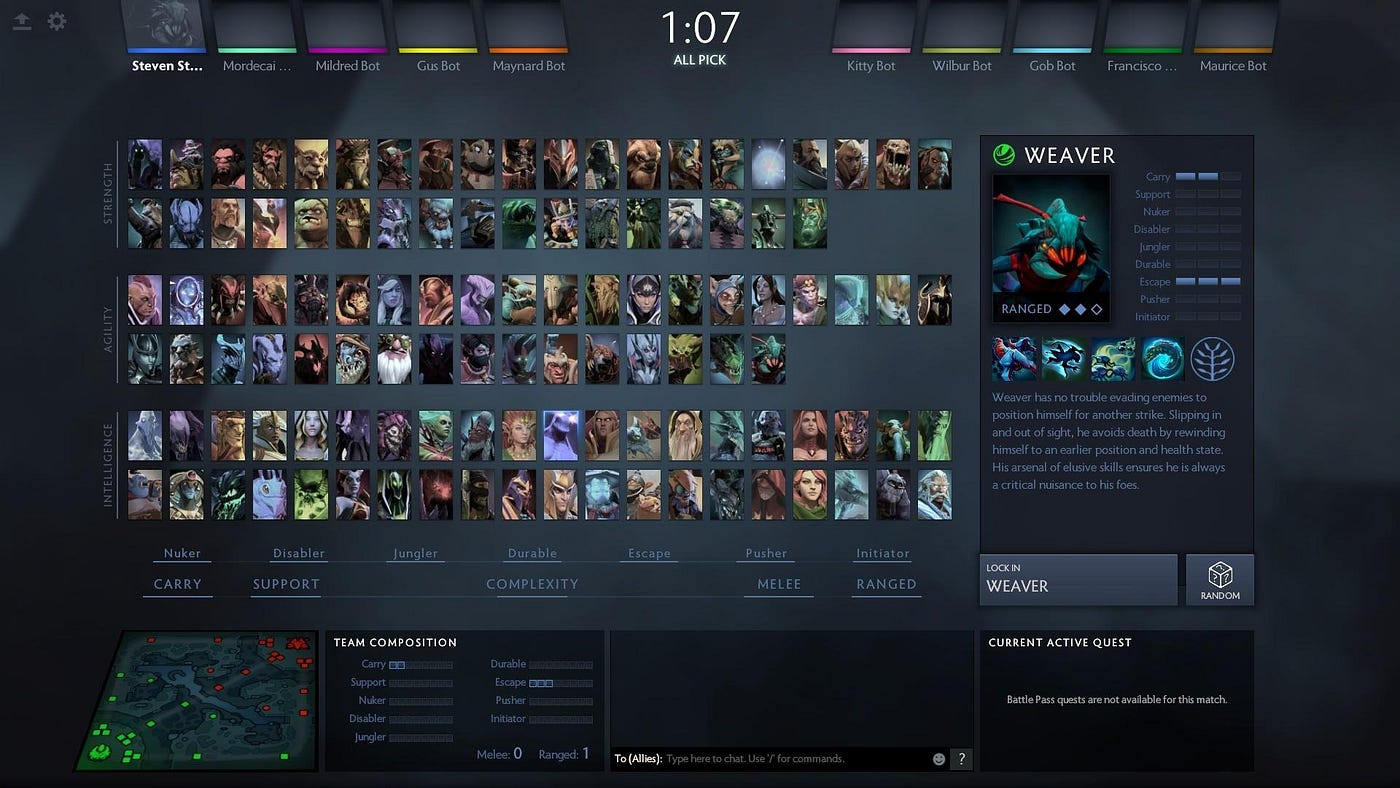
<br>
<br>
This dataset contains 50000 ranked ladder matches from the Dota 2 data dump created by Opendota.<br>
The dataset taken from __[here](https://www.kaggle.com/datasets/devinanzelmo/dota-2-matches)__

Data licence __[CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)__

___

## Setup

In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Program Files\Python39\python.exe
3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [315]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

In [4]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.20.3
1.3.2
0.11.2


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [87]:
sns.set(rc={'figure.figsize':(13,9)})

___

## Data exploration

First, let's examine the contents of the files. Get a list of files in a directory:

In [7]:
os.listdir('../archive')

['ability_ids.csv',
 'ability_upgrades.csv',
 'chat.csv',
 'cluster_regions.csv',
 'hero_names.csv',
 'item_ids.csv',
 'match.csv',
 'match_outcomes.csv',
 'objectives.csv',
 'patch_dates.csv',
 'players.csv',
 'player_ratings.csv',
 'player_time.csv',
 'purchase_log.csv',
 'teamfights.csv',
 'teamfights_players.csv',
 'test_labels.csv',
 'test_player.csv',
 'yasp_sample.json']

___

Let's begin with reading table

`match_id` A unique identifier for the match. <br>
`start_time` The start time of the match in Unix time format. <br>
`duration` The duration of the match in seconds.<br>
`tower_status_radiant` A binary code representing the status of Radiant team's towers at the end of the match. <br>
`tower_status_dire` A binary code representing the status of Dire team's towers at the end of the match. <br>
`barracks_status_dire` A binary code representing the status of Dire team's barracks at the end of the match. <br>
`barracks_status_radiant` A binary code representing the status of Radiant team's barracks at the end of the match. <br>
`first_blood_time` The time in seconds when the first blood occurred in the match. <br>
`game_mode` An integer code representing the game mode of the match. <br>
`radiant_win` A boolean value representing whether the Radiant team won the match or not. <br>
`negative_votes` The number of negative votes the match received from players. <br>
`positive_votes` The number of positive votes the match received from players. <br>
`cluster` An integer code representing the cluster or region where the match was played. <br>
<br>
This table has a lot of useful metadata on the results of the match

In [8]:
df_match = pd.read_csv('../archive/match.csv')
df_match.head(10)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156
5,5,1446798766,1574,2047,4,3,63,113,22,True,0,0,155
6,6,1446800938,2124,1972,0,3,63,4,22,True,0,0,151
7,7,1446804030,2328,2046,0,0,63,255,22,True,0,0,138
8,8,1446819063,2002,0,1982,63,0,4,22,False,0,0,182
9,9,1446837251,2961,0,1972,63,0,85,22,False,0,0,133


___

`match_id` A unique identifier for the match. <br>
`account_id_0` -  `account_id_4` A unique identifier for the player. <br>
`start_time` The start time of the match in Unix time format. <br>
`parser_version` OpenDota parser number <br>
`win` Match status for the team <br>
`rad` Side status<br>
<br>
Table with data about match results

In [9]:
df_match_outcomes = pd.read_csv('../archive/match_outcomes.csv')
df_match_outcomes.head(10)

,match_id,account_id_0,account_id_1,account_id_2,account_id_3,account_id_4,start_time,parser_version,win,rad
0,1636204962,34549,0,0,-51743434,-120875154,1437014585,12,1,0
1,1636204962,0,61598,138825,0,207232,1437014585,12,0,1
2,1636322679,0,-44943233,-240360907,19599,0,1437019968,12,0,0
3,1636322679,-97530201,0,0,0,-116349387,1437019968,12,1,1
4,1637385965,0,0,0,104738,0,1437052551,12,1,0
5,1637385965,0,0,278620,278619,0,1437052551,12,0,1
6,1637623870,-123447796,68408,-100048908,-16784805,320715,1437058007,12,1,0
7,1637623870,-108454938,-251819996,0,51172,-106710926,1437058007,12,0,1
8,1637739731,320093,0,178850,-45490226,-119392638,1437060903,12,0,0
9,1637739731,0,241925,-115963827,14072,-67386586,1437060903,12,1,1


___

`match_id` A unique identifier for the match. <br>
`times` Time from start <br>
`gold_t_0` - `gold_t_132` Earned gold <br>
`lh_t_0` - `lh_t_132` Last hits on creeeps <br>
`xp_t_0` - `xp_t_132` Earned experience <br>
<br>
Interesing table with hero progess on each 60 seconds

In [10]:
df_player_time = pd.read_csv('../archive/player_time.csv')
df_player_time.head(10)

,match_id,times,gold_t_0,lh_t_0,xp_t_0,gold_t_1,lh_t_1,xp_t_1,gold_t_2,lh_t_2,xp_t_2,gold_t_3,lh_t_3,xp_t_3,gold_t_4,lh_t_4,xp_t_4,gold_t_128,lh_t_128,xp_t_128,gold_t_129,lh_t_129,xp_t_129,gold_t_130,lh_t_130,xp_t_130,gold_t_131,lh_t_131,xp_t_131,gold_t_132,lh_t_132,xp_t_132
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,60,409,0,63,142,1,186,168,0,125,200,0,193,194,1,125,174,2,77,138,1,62,345,6,351,100,0,77,613,1,125
2,0,120,546,0,283,622,4,645,330,0,376,345,1,698,628,5,374,354,4,437,673,5,543,684,12,805,200,0,210,815,5,323
3,0,180,683,1,314,927,9,1202,430,0,376,644,6,1172,806,7,570,614,8,829,895,8,842,958,16,1135,300,0,210,1290,8,527
4,0,240,956,1,485,1264,11,1583,530,0,391,919,11,1610,1281,10,1216,1082,8,1318,1087,10,1048,1500,26,1842,400,0,210,1431,9,589
5,0,300,1056,1,649,1451,13,1810,630,0,504,1102,15,1888,1708,17,1633,1300,11,1901,1233,11,1352,1841,32,2162,500,0,241,2110,17,918
6,0,360,1156,1,680,1744,18,2192,730,0,535,1326,18,2197,2339,21,2203,1520,14,2231,1497,15,1806,2186,38,2554,600,0,241,2623,28,1248
7,0,420,1257,2,778,2053,23,2584,830,0,566,1711,25,2558,2693,27,2574,1620,14,2231,1761,19,2033,2652,47,3111,700,0,241,3033,28,1329
8,0,480,1809,3,1135,2536,32,3153,1328,0,1144,2075,32,3161,3269,31,3046,1720,14,2384,2126,25,2575,3196,57,3715,858,1,300,3380,32,1535
9,0,540,2111,3,1393,3033,33,3449,1510,1,1306,2386,39,3398,3606,36,3361,2194,22,2905,2306,27,2967,3629,65,4169,958,1,300,3648,34,1697


___

`match_id` A unique identifier for the match. <br>
`key` Event key <br>
`player1` The player who caused the event <br>
`slot` Chat slot <br>
`subtype`  Event type <br>
`time` Event time <br>
`value` Event value (example barack kill) <br>
<br>
Table with event timing

In [296]:
df_objectives = pd.read_csv('../archive/objectives.csv')
df_objectives.head(10)

,match_id,key,player1,player2,slot,subtype,team,time,value
0,0,NaN,0,6,0.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,1,309
1,0,NaN,3,-1,3.0,CHAT_MESSAGE_TOWER_KILL,2.0,894,2
2,0,NaN,2,-1,NaN,CHAT_MESSAGE_ROSHAN_KILL,2.0,925,200
3,0,NaN,1,-1,1.0,CHAT_MESSAGE_AEGIS,NaN,925,0
4,0,NaN,7,-1,7.0,CHAT_MESSAGE_TOWER_KILL,3.0,1016,3
5,0,NaN,3,-1,3.0,CHAT_MESSAGE_TOWER_KILL,2.0,1024,2
6,0,NaN,-1,-1,-1.0,CHAT_MESSAGE_TOWER_KILL,2.0,1446,2
7,0,NaN,4,-1,4.0,CHAT_MESSAGE_TOWER_KILL,2.0,1590,2
8,0,NaN,2,-1,NaN,CHAT_MESSAGE_ROSHAN_KILL,2.0,1740,200
9,0,NaN,1,-1,1.0,CHAT_MESSAGE_AEGIS,NaN,1740,0


___

Table with players stats

In [12]:
df_players = pd.read_csv('../archive/players.csv')
df_players.head(15)

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,level,leaver_status,xp_hero,xp_creep,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,unit_order_none,unit_order_move_to_position,unit_order_move_to_target,unit_order_attack_move,unit_order_attack_target,unit_order_cast_position,unit_order_cast_target,unit_order_cast_target_tree,unit_order_cast_no_target,unit_order_cast_toggle,unit_order_hold_position,unit_order_train_ability,unit_order_drop_item,unit_order_give_item,unit_order_pickup_item,unit_order_pickup_rune,unit_order_purchase_item,unit_order_sell_item,unit_order_disassemble_item,unit_order_move_item,unit_order_cast_toggle_auto,unit_order_stop,unit_order_taunt,unit_order_buyback,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143,180,37,73,56,108,0,16,0,8840.0,5440.0,NaN,83.0,50.0,-957.0,NaN,NaN,212.0,3120.0,5145.0,1087.0,400.0,NaN,NaN,4070.0,1.0,25.0,416.0,51.0,144.0,3.0,71.0,NaN,188.0,16.0,NaN,NaN,NaN,2.0,35.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423,46,63,119,102,24,108,22,0,14331.0,8440.0,2683.0,671.0,395.0,-1137.0,NaN,NaN,1650.0,3299.0,6676.0,4317.0,937.0,NaN,NaN,5894.0,214.0,165.0,1031.0,98.0,39.0,4.0,439.0,NaN,346.0,22.0,NaN,NaN,12.0,52.0,30.0,4.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399,48,60,59,108,65,0,17,0,6692.0,8112.0,NaN,453.0,259.0,-1436.0,-1015.0,NaN,NaN,3142.0,2418.0,3697.0,400.0,NaN,NaN,7053.0,3.0,132.0,645.0,36.0,160.0,20.0,373.0,NaN,643.0,17.0,5.0,NaN,7.0,8.0,28.0,NaN,1.0,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,19,6,271,None,14832,2714,6055,63,147,154,164,79,160,21,0,8583.0,14230.0,894.0,293.0,100.0,-2156.0,NaN,NaN,938.0,4714.0,4104.0,10432.0,400.0,NaN,NaN,4712.0,133.0,163.0,690.0,9.0,15.0,7.0,406.0,NaN,150.0,21.0,NaN,NaN,1.0,9.0,45.0,7.0,NaN,14.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,17,13,245,None,33740,243,1833,114,92,147,0,137,63,24,0,15814.0,14325.0,NaN,62.0,NaN,-1437.0,-1056.0,NaN,4194.0,3217.0,7467.0,9220.0,400.0,NaN,NaN,3853.0,7.0,7.0,1173.0,31.0,84.0,8.0,198.0,NaN,111.0,23.0,1.0,NaN,NaN,2.0,44.0,6.0,NaN,13.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
5,0,4,106,128,476,12285,397,524,5,6,8,5,162,None,10725,0,112,145,73,149,48,212,0,19,0,8502.0,12259.0,NaN,1.0,NaN,-2394.0,-2240.0,NaN,200.0,320.0,5281.0,6193.0,NaN,NaN,NaN,6593.0,166.0,76.0,832.0,196.0,3.0,5.0,96.0,2.0,161.0,19.0,NaN,NaN,2.0,NaN,36.0,3.0,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
6,0,0,102,129,317,10355,303,369,4,13,5,2,107,None,15028,764,0,50,11,102,36,185,81,16,0,5201.0,9417.0,NaN,1.0,NaN,-3287.0,NaN,NaN,262.0,320.0,3396.0,4356.0,NaN,NaN,NaN,3325.0,63.0,100.0,609.0,13.0,173.0,14.0,168.0,NaN,118.0,16.0,NaN,NaN,1.0,1.0,43.0,3.0,NaN,13.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
7,0,5,46,130,2390,13395,452,517,4,8,6,31,208,None,10230,0,2438,41,63,36,147,168,21,19,0,6853.0,13396.0,NaN,244.0,107.0,-3682.0,NaN,NaN,242.0,695.0,4350.0,8797.0,NaN,NaN,NaN,13557.0,11.0,214.0,3386.0,122.0,NaN,3.0,506.0,NaN,491.0,18.0,2.0,3.0,18.0,18.0,30.0,1.0,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,110.0,NaN,NaN,NaN,NaN,NaN
8,0,0,7,131,475,5035,189,223,1,14,8,0,27,67.0277,4774,0,0,36,0,0,46,0,180,12,0,4798.0,4038.0,NaN,27.0,NaN,-3286.0,-39.0,NaN,NaN,320.0,2127.0,1089.0,NaN,NaN,NaN,2217.0,55.

___

`account_id` And unique match id<br>
`total_wins` Total wins on account<br>
`total_matches` Total matches on account<br>
`trueskill_mu` Miltiskills rating <br>
`trueskill_sigma` Sigma rating <br>
<br>
Table with accounts data

In [13]:
df_player_ratings = pd.read_csv('../archive/player_ratings.csv')
df_player_ratings.head(5)

,account_id,total_wins,total_matches,trueskill_mu,trueskill_sigma
0,236579,14,24,27.868035,5.212361
1,-343,1,1,26.544163,8.065475
2,-1217,1,1,26.521103,8.114989
3,-1227,1,1,27.248025,8.092217
4,-1284,0,1,22.931016,8.092224


___

`item_id` Unique item id<br>
`time` Purchase time<br>
`player_slot` Playes slot <br>
`match_id` Unique match id<br>
<br>
Items are important part of match, usually right pick can win the game

In [14]:
df_purchase_log = pd.read_csv('../archive/purchase_log.csv')
df_purchase_log.head(5)

,item_id,time,player_slot,match_id
0,44,-81,0,0
1,29,-63,0,0
2,43,6,0,0
3,84,182,0,0
4,46,197,0,0


___

In Dota 2, each time you level up, you can upgrade one ability. <br>
At 6, you can open the ult - most often this is the strongest ability that can change the course of the battle. When analyzing, it will be useful to know the time of the open ult.<br>
This table shows in what order and at what time the heroes pumped their abilities<br>
`ability` The ability id <br>
`level` Hero level <br>
`time` Time ability gained <br>
`player_slot` Played number <br>
`match_id`  Match unique id

In [15]:
df_ability_upgrades = pd.read_csv('../archive/ability_upgrades.csv')
df_ability_upgrades.head(5)

,ability,level,time,player_slot,match_id
0,5448,1,326,0,0
1,5450,2,452,0,0
2,5450,3,582,0,0
3,5448,4,804,0,0
4,5450,5,916,0,0


___

Logs about teamfight

In [16]:
df_teamfights = pd.read_csv('../archive/teamfights.csv')
df_teamfights.head(5)

,match_id,start,end,last_death,deaths
0,0,220,252,237,3
1,0,429,475,460,3
2,0,900,936,921,3
3,0,1284,1328,1313,3
4,0,1614,1666,1651,5


___

Teamfights event with players info

In [17]:
df_teamfights_players = pd.read_csv('../archive/teamfights_players.csv')
df_teamfights_players.head(10)

,match_id,player_slot,buybacks,damage,deaths,gold_delta,xp_end,xp_start
0,0,0,0,105,0,173,536,314
1,0,1,0,566,1,0,1583,1418
2,0,2,0,0,0,0,391,391
3,0,3,0,0,0,123,1775,1419
4,0,4,0,444,0,336,1267,983
5,0,128,0,477,1,249,1318,1035
6,0,129,0,636,1,-27,1048,904
7,0,130,0,0,0,190,1904,1589
8,0,131,0,0,0,0,210,210
9,0,132,0,0,0,378,659,589


___

Chat messages could be funny sometimes <br>

In [18]:
df_chat = pd.read_csv('../archive/chat.csv')
df_chat.head(10)

,match_id,key,slot,time,unit
0,0,force it,6,-8,6k Slayer
1,0,space created,1,5,Monkey
2,0,hah,1,6,Monkey
3,0,ez 500,6,9,6k Slayer
4,0,mvp ulti,4,934,Kira
5,0,bye,6,1486,6k Slayer
6,0,hah,1,1488,Monkey
7,0,fate,6,1496,6k Slayer
8,0,is cruel,6,1502,6k Slayer
9,0,fuck my ass,0,1524,Double T


___

`ability_id` Ability id <br>
`ability_name` Ability name<br>
<br>
Mapping between ability id and ability name

In [19]:
df_ability_ids = pd.read_csv('../archive/ability_ids.csv')
df_ability_ids.head(5)

,ability_id,ability_name
0,0,ability_base
1,5001,default_attack
2,5002,attribute_bonus
3,5003,antimage_mana_break
4,5004,antimage_blink


___

Mapping between cluster and region

In [20]:
df_cluster_regions = pd.read_csv('../archive/cluster_regions.csv')
df_cluster_regions.head(5)

,cluster,region
0,111,US WEST
1,112,US WEST
2,113,US WEST
3,121,US EAST
4,122,US EAST


___

Mapping between hero short name, hero id and full name

In [21]:
df_hero_names = pd.read_csv('../archive/hero_names.csv')
df_hero_names.head(10)

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden
5,npc_dota_hero_drow_ranger,6,Drow Ranger
6,npc_dota_hero_earthshaker,7,Earthshaker
7,npc_dota_hero_juggernaut,8,Juggernaut
8,npc_dota_hero_mirana,9,Mirana
9,npc_dota_hero_morphling,10,Morphling


___

Mapping between item id and item name

In [22]:
df_item_ids = pd.read_csv('../archive/item_ids.csv')
df_item_ids.head(5)

,item_id,item_name
0,1,blink
1,2,blades_of_attack
2,3,broadsword
3,4,chainmail
4,5,claymore


___

Dates of game patches

In [23]:
df_patch_dates = pd.read_csv('../archive/patch_dates.csv')
df_patch_dates.head(5)

,patch_date,name
0,2010-12-24T00:00:00Z,6.70
1,2011-01-21T00:00:00Z,6.71
2,2011-04-27T00:00:00Z,6.72
3,2011-12-24T00:00:00Z,6.73
4,2012-03-10T00:00:00Z,6.74


___

## Primary analysis

### Match time

Let's begin with the basics

In [24]:
df_match.head(3)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132


In [25]:
round(2.6)

3

In [26]:
df_match["duration_min"] = df_match.apply(lambda x: round(x['duration'] / 60), axis=1)

In [27]:
df_match["duration_min"].min()

1

In [28]:
df_match["duration_min"].max()

267

In [29]:
df_match["duration_min"].mean()

41.26778

So, the fastest match is 1 min, longest is about 4 hours. Let's check out

<AxesSubplot:xlabel='duration_min', ylabel='Count'>

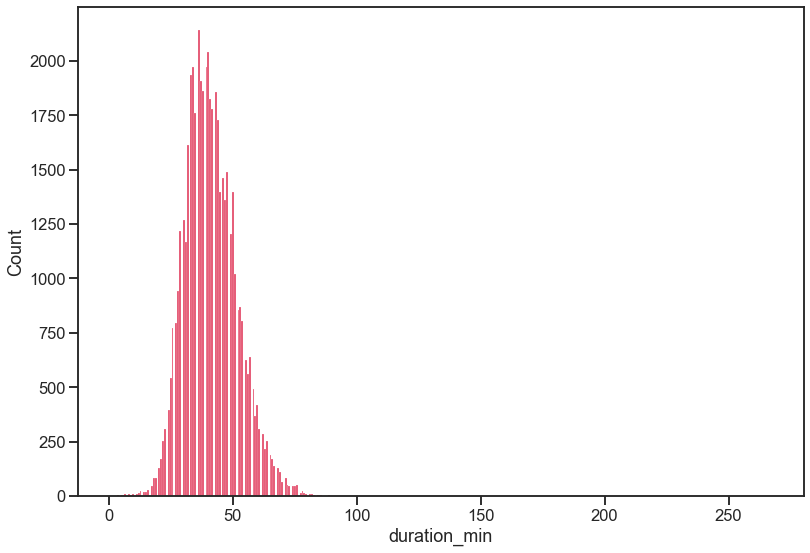

In [430]:
sns.histplot(data=df_match[['duration_min']], x="duration_min", palette = "Set1", color='#DC143C')

Sure there is outlets. Lets fix that

In [31]:
q1 = df_match['duration_min'].quantile(q=0.95)
q2 = df_match['duration_min'].quantile(q=0.05)

In [32]:
df_match_outlets = df_match[df_match['duration_min'].between(q2, q1)]

<AxesSubplot:xlabel='duration_min', ylabel='Count'>

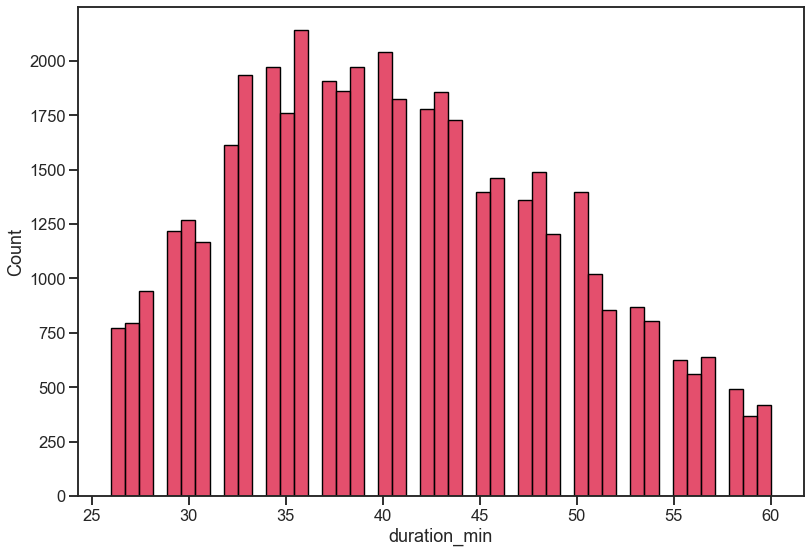

In [431]:
sns.histplot(data=df_match_outlets[['duration_min']], x="duration_min", palette = "Set2", edgecolor = "black", color='#DC143C')

This looks more like normal distribution

In [34]:
Q3 = np.quantile(df_match['duration_min'], 0.75)
Q1 = np.quantile(df_match['duration_min'], 0.25)
IQR = Q3 - Q1
lowerRange = Q1 - 1.5 * IQR
upperRange = Q3 + 1.5 * IQR

In [35]:
lowerRange, upperRange

(13.0, 69.0)

In [36]:
dfIqr = df_match[df_match['duration_min'].between(lowerRange, upperRange)]

<AxesSubplot:xlabel='duration_min', ylabel='Count'>

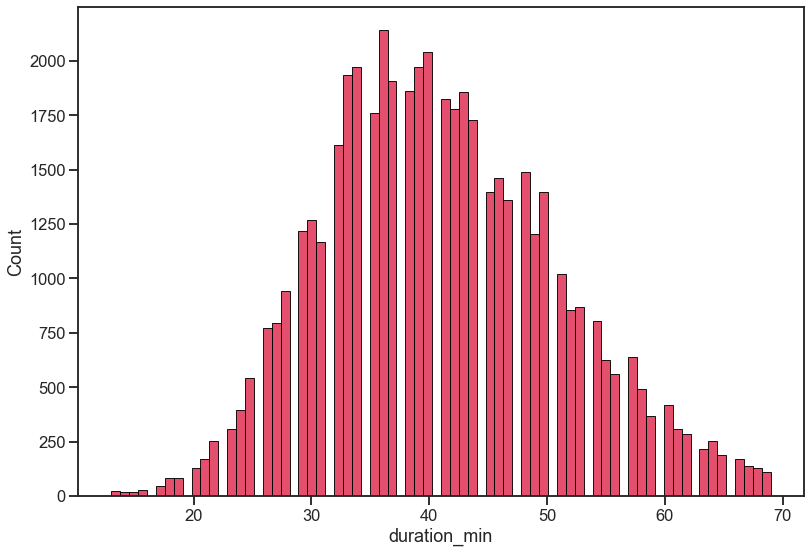

In [432]:
sns.histplot(data=dfIqr[['duration_min']], x="duration_min", palette = "Set2", edgecolor = "black", color='#DC143C')

___

## Geting data insight

Usually players want to know meta heros and best items. Lest look at game from analytics point of view

### Enrich heros table

In [38]:
df_hero_names.head(3)

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane


In [39]:
df_players.head(3)

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,level,leaver_status,xp_hero,xp_creep,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,unit_order_none,unit_order_move_to_position,unit_order_move_to_target,unit_order_attack_move,unit_order_attack_target,unit_order_cast_position,unit_order_cast_target,unit_order_cast_target_tree,unit_order_cast_no_target,unit_order_cast_toggle,unit_order_hold_position,unit_order_train_ability,unit_order_drop_item,unit_order_give_item,unit_order_pickup_item,unit_order_pickup_rune,unit_order_purchase_item,unit_order_sell_item,unit_order_disassemble_item,unit_order_move_item,unit_order_cast_toggle_auto,unit_order_stop,unit_order_taunt,unit_order_buyback,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143,180,37,73,56,108,0,16,0,8840.0,5440.0,NaN,83.0,50.0,-957.0,NaN,NaN,212.0,3120.0,5145.0,1087.0,400.0,NaN,NaN,4070.0,1.0,25.0,416.0,51.0,144.0,3.0,71.0,NaN,188.0,16.0,NaN,NaN,NaN,2.0,35.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423,46,63,119,102,24,108,22,0,14331.0,8440.0,2683.0,671.0,395.0,-1137.0,NaN,NaN,1650.0,3299.0,6676.0,4317.0,937.0,NaN,NaN,5894.0,214.0,165.0,1031.0,98.0,39.0,4.0,439.0,NaN,346.0,22.0,NaN,NaN,12.0,52.0,30.0,4.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399,48,60,59,108,65,0,17,0,6692.0,8112.0,NaN,453.0,259.0,-1436.0,-1015.0,NaN,NaN,3142.0,2418.0,3697.0,400.0,NaN,NaN,7053.0,3.0,132.0,645.0,36.0,160.0,20.0,373.0,NaN,643.0,17.0,5.0,NaN,7.0,8.0,28.0,NaN,1.0,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN


Start with win rate

$$
P(h) = g_{hero} / g_{total} * 100
$$
<br>
We can find the probability of encountering a hero in match with a simple formula

In [40]:
df_heros_in_match = df_players.groupby('match_id')['hero_id'].apply(list)

In [41]:
def find_populatity(hero_id):
    total = df_heros_in_match.map(lambda x: 1 if hero_id in x else 0).sum()
    percentage = total / len(df_heros_in_match)
    return percentage * 100

In [42]:
df_hero_names['popularity'] = df_hero_names.apply(lambda x: find_populatity(x['hero_id']), axis = 1)

In [43]:
df_hero_names.sort_values(by=['popularity'], ascending=False)[['localized_name', 'popularity']].head(10)

,localized_name,popularity
20,Windranger,41.762
10,Shadow Fiend,34.014
72,Invoker,23.352
6,Earthshaker,22.646
26,Slardar,22.362
37,Queen of Pain,21.180
7,Juggernaut,20.788
98,Tusk,20.612
71,Alchemist,19.646
13,Pudge,18.894


### Hero win rate

$$
P(w) = g_{win} / g_{total} * 100
$$

In [44]:
df_side = df_players[['match_id', 'hero_id', 'player_slot']]
df_side.head(5)

,match_id,hero_id,player_slot
0,0,86,0
1,0,51,1
2,0,83,2
3,0,11,3
4,0,67,4


In [45]:
df_side['dire'] = df_side['player_slot'].map(lambda x: 1 if x > 5 else 0)

C:\Users\the_r\AppData\Local\Temp/ipykernel_13088/3683468911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_side['dire'] = df_side['player_slot'].map(lambda x: 1 if x > 5 else 0)


In [46]:
df_side['radiant'] = df_side['player_slot'].map(lambda x: 1 if x < 5 else 0)

C:\Users\the_r\AppData\Local\Temp/ipykernel_13088/2328305255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_side['radiant'] = df_side['player_slot'].map(lambda x: 1 if x < 5 else 0)


In [47]:
df_side.head(8)

,match_id,hero_id,player_slot,dire,radiant
0,0,86,0,0,1
1,0,51,1,0,1
2,0,83,2,0,1
3,0,11,3,0,1
4,0,67,4,0,1
5,0,106,128,1,0
6,0,102,129,1,0
7,0,46,130,1,0


In [48]:
df_match_result = df_match[['match_id', 'radiant_win']]

In [49]:
df_side = df_side.merge(df_match_result, how='left', on='match_id')

In [50]:
def true_win(row):
    dire = row['dire']
    radiant = row['radiant']
    radiant_win = row['radiant_win']
    if radiant_win:
        return radiant
    else:
        return dire

In [51]:
df_side['win'] = df_side.apply(lambda row: true_win(row), axis = 1)

In [52]:
df_side.head(6)

,match_id,hero_id,player_slot,dire,radiant,radiant_win,win
0,0,86,0,0,1,True,1
1,0,51,1,0,1,True,1
2,0,83,2,0,1,True,1
3,0,11,3,0,1,True,1
4,0,67,4,0,1,True,1
5,0,106,128,1,0,True,0


In Dota, there cannot be a duplicate hero in a match

In [53]:
def calculate_win_rate(hero_id):
    total_matches = df_side[df_side['hero_id'] == hero_id]['match_id'].count()
    total_wins = df_side[df_side['hero_id'] == hero_id]['win'].sum()
    win_rate = total_wins / total_matches * 100
    return win_rate

In [54]:
df_hero_names['win_rate'] = df_hero_names['hero_id'].map(lambda x: calculate_win_rate(x))
df_hero_names.head()

C:\Users\the_r\AppData\Local\Temp/ipykernel_13088/2126818878.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  win_rate = total_wins / total_matches * 100


,name,hero_id,localized_name,popularity,win_rate
0,npc_dota_hero_antimage,1,Anti-Mage,18.792,46.296296
1,npc_dota_hero_axe,2,Axe,9.202,43.447077
2,npc_dota_hero_bane,3,Bane,5.106,47.081864
3,npc_dota_hero_bloodseeker,4,Bloodseeker,5.912,45.399188
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden,15.692,53.976549


In [55]:
df_hero_names.sort_values(by=['win_rate'], ascending=False)[['localized_name', 'win_rate']].head(10)

,localized_name,win_rate
55,Omniknight,59.058322
65,Spectre,58.348348
40,Wraith King,57.967667
83,Undying,56.881196
100,Abaddon,56.858006
68,Ursa,56.810786
34,Necrophos,56.357849
29,Lich,56.005974
26,Slardar,55.934174
21,Zeus,55.502288


### Highest kills per match

In [56]:
df_kills = df_players[['match_id', 'hero_id', 'kills']]

In [57]:
def average_kills(hero_id):
    avg = df_kills[df_kills['hero_id'] == hero_id]['kills'].mean()
    return avg

In [58]:
df_hero_names["average_kills"] = df_hero_names['hero_id'].map(average_kills)

In [59]:
df_hero_names.sort_values(by=['average_kills'], ascending=False)[['localized_name', 'average_kills']].head(10)

,localized_name,average_kills
30,Riki,12.713768
68,Ursa,11.712459
37,Queen of Pain,10.824551
44,Templar Assassin,10.810659
57,Huskar,10.719461
91,Slark,10.600285
32,Tinker,10.509962
10,Shadow Fiend,10.304933
54,Clinkz,10.247681
21,Zeus,10.025278


### XP per minute & Gold per minute

In [60]:
df_hero_names['xpm'] = df_hero_names['hero_id'].map(lambda x: df_players[df_players['hero_id'] == x]['xp_per_min'].mean())

In [61]:
df_hero_names.sort_values(by=['xpm'], ascending=False)[['localized_name', 'xpm']].head(10)

,localized_name,xpm
80,Meepo,675.131138
0,Anti-Mage,580.392827
71,Alchemist,577.001832
44,Templar Assassin,574.769613
10,Shadow Fiend,572.849827
7,Juggernaut,549.420435
68,Ursa,548.004649
91,Slark,547.568004
46,Luna,543.310765
104,Ember Spirit,541.980353


In [62]:
df_hero_names['gpm'] = df_hero_names['hero_id'].map(lambda x: df_players[df_players['hero_id'] == x]['gold_per_min'].mean())

In [63]:
df_hero_names.sort_values(by=['gpm'], ascending=False)[['localized_name', 'gpm']].head(10)

,localized_name,gpm
71,Alchemist,709.545455
0,Anti-Mage,554.192742
10,Shadow Fiend,551.266302
44,Templar Assassin,523.577292
80,Meepo,522.703593
46,Luna,520.486543
7,Juggernaut,520.126515
70,Gyrocopter,500.291861
92,Medusa,497.504661
65,Spectre,495.294745


### Visualization part

In [64]:
df_hero_names.head()

,name,hero_id,localized_name,popularity,win_rate,average_kills,xpm,gpm
0,npc_dota_hero_antimage,1,Anti-Mage,18.792,46.296296,7.340996,580.392827,554.192742
1,npc_dota_hero_axe,2,Axe,9.202,43.447077,8.525321,442.938274,400.109107
2,npc_dota_hero_bane,3,Bane,5.106,47.081864,4.766941,336.720329,295.293380
3,npc_dota_hero_bloodseeker,4,Bloodseeker,5.912,45.399188,9.657307,494.835927,447.641746
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden,15.692,53.976549,4.483686,346.943411,314.668876


In [71]:
import matplotlib.pyplot as plt

In [97]:
sns.set_theme()

In [92]:
sns.set_style("dark")

In [101]:
sns.set_style("ticks")
sns.set_context("talk")

In [141]:
top5_popular = df_hero_names.sort_values(by=['popularity'], ascending=False)[['localized_name', 'popularity']].head(6)

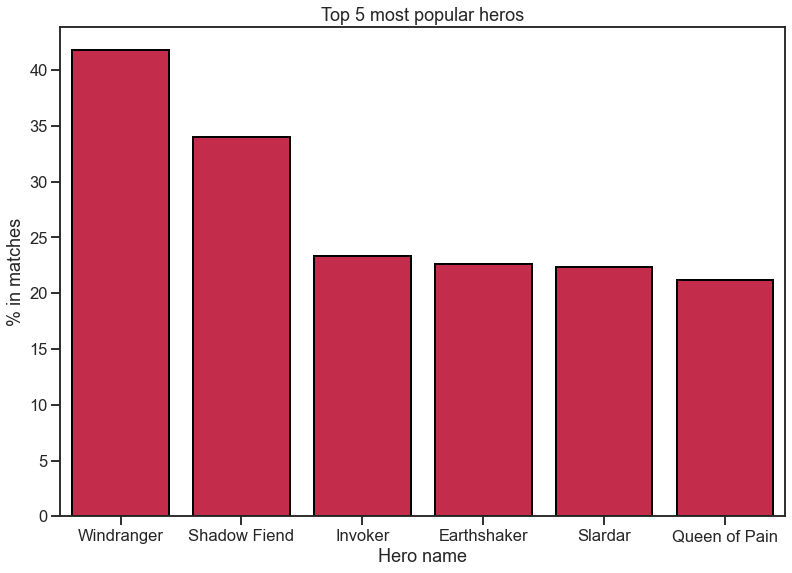

In [146]:
sns.barplot(data=top5_popular,
            x="localized_name",
            y="popularity",
            color='#DC143C',
            edgecolor='#000000',
            lw=2).set(xlabel='Hero name',
                      ylabel='% in matches',
                      title='Top 5 most popular heros')
plt.show()

In [152]:
top5_win_rate = df_hero_names.sort_values(by=['win_rate'], ascending=False)[['localized_name', 'win_rate']].head(5)

In [154]:
top5_win_rate['win_rate'] - 50

55     9.058322
65     8.348348
40     7.967667
83     6.881196
100    6.858006
Name: win_rate, dtype: float64

In [157]:
top5_win_rate

,name,hero_id,localized_name,popularity,win_rate,average_kills,xpm,gpm
55,npc_dota_hero_omniknight,57,Omniknight,10.322,59.058322,3.091068,356.593683,312.302655
65,npc_dota_hero_spectre,67,Spectre,13.320,58.348348,9.656607,540.556006,495.294745
40,npc_dota_hero_skeleton_king,42,Wraith King,15.588,57.967667,7.865538,523.855530,479.170003
83,npc_dota_hero_undying,85,Undying,11.902,56.881196,5.899681,384.340279,348.256091
100,npc_dota_hero_abaddon,102,Abaddon,6.620,56.858006,5.005740,417.260725,363.055287


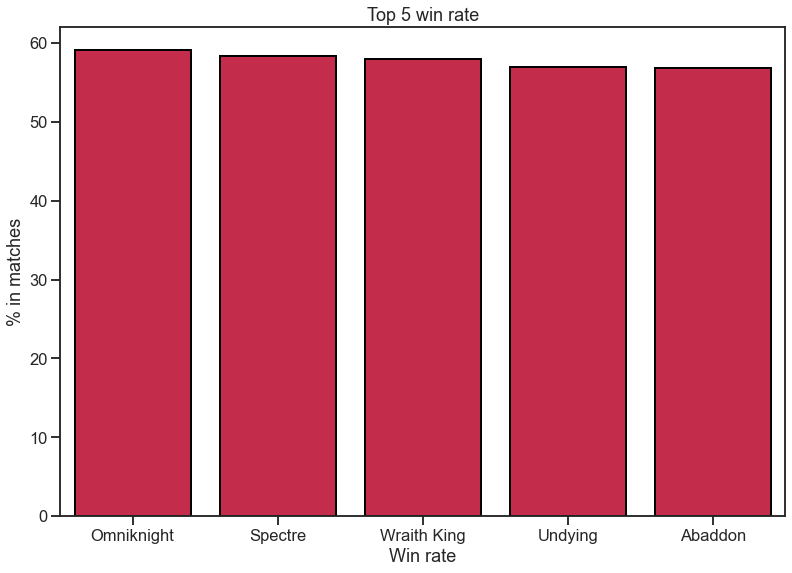

In [156]:
top5_win_rate = df_hero_names.sort_values(by=['win_rate'], ascending=False).head(5)
sns.barplot(data=top5_win_rate,
            x="localized_name",
            y="win_rate",
            color='#DC143C',
            edgecolor='#000000',
            lw=2).set(xlabel='Win rate',
                      ylabel='% in matches',
                      title='Top 5 win rate')
plt.show()

In [ ]:
top5_average_kills = df_hero_names.sort_values(by=['popularity'], ascending=False)[['localized_name', 'average_kills']].head(5)
sns.barplot(data=top5_average_kills, x="localized_name", y="average_kills")

In [ ]:
top5_xpm = df_hero_names.sort_values(by=['popularity'], ascending=False)[['localized_name', 'xpm']].head(5)
sns.barplot(data=top5_xpm, x="localized_name", y="xpm")

In [ ]:
top5_gpm = df_hero_names.sort_values(by=['popularity'], ascending=False)[['localized_name', 'gpm']].head(5)
sns.barplot(data=top5_popular, x="localized_name", y="gpm")

___

### Most effective combo

> Algorithm is working, but this can take some to run it.

//working on optimization

In [ ]:
import itertools

In [ ]:
nums = df_hero_names['hero_id'].values

In [ ]:
permutations = list(itertools.permutations(nums, 2))

Total number of combos

In [ ]:
len(permutations)

In [ ]:
df_side

In [ ]:
d = {'col1': [1, 2], 'col2': [3, 4]}

In [ ]:
df_side['match_id'].max()

In [ ]:
def get_win(group):
    match_id = group['match_id'].max()
    hero_ids = group['hero_id'].values
    win = group['win'].max()
    d = {'match_id': match_id, 'hero_ids': [hero_ids], 'win' : win}
    row = pd.DataFrame(data=d)
    return row
    #print(row)

In [ ]:
#df_win_grouped = df_side.groupby(['match_id', 'dire']).apply(get_win)

In [ ]:
#df_win_grouped.head(10)

In [ ]:
def check_combo(combo, row):
    if combo[0] in row['hero_ids']:
        if combo[1] in row['hero_ids']:
            return 1
    return 0

In [ ]:
def check_combo_win(combo, row):
    if combo[0] in row['hero_ids']:
        if combo[1] in row['hero_ids']:
            if row['win'] == 1:
                return 1
    return 0

In [ ]:
dictionary

In [ ]:
dictionary = {}
for i in permutations:
    total = df_win_grouped.apply(lambda x: check_combo(i, x), axis = 1).sum()
    wins = df_win_grouped.apply(lambda x: check_combo_win(i, x), axis = 1).sum()
    print(wins / total * 100)
    
    name = str(i[0]) + "," +str(i[1])
    dictionary[name] = wins / total * 100

### Top items

In [ ]:
df_item_ids.head()

In [ ]:
df_purchase_log.head()

In [ ]:
def items_percentage_in_matches(item):
    total = 50000
    items = items_in_match.map(lambda x: 1 if item in x else 0).sum()
    return items/total * 100

In [ ]:
df_item_ids['appear_percentage'] = df_item_ids.apply(lambda x: items_percentage_in_matches(x['item_id']), axis = 1)

In [ ]:
df_item_ids.head(15)

In [ ]:
items_in_match = df_purchase_log.groupby('match_id')['item_id'].apply(list)

In [ ]:
items_in_match.map(lambda x: 1 if 1 in x else 0).sum()

### Top first item picks

In [158]:
df_purchase_log.head()

,item_id,time,player_slot,match_id
0,44,-81,0,0
1,29,-63,0,0
2,43,6,0,0
3,84,182,0,0
4,46,197,0,0


In [ ]:
df_purchase_log_top_6 = df_purchase_log.groupby(['match_id', 'player_slot'], as_index=False).head(6)[['item_id', 'match_id', 'player_slot']]

In [ ]:
df_purchase_log_top_6.head(10)

In [ ]:
purchase_log_top_6 = df_purchase_log_top_6.groupby(['match_id', 'player_slot'])['item_id'].apply(list)

In [ ]:
def items_percentage_in_matches_top_5(item):
    total = 50000
    items = purchase_log_top_5.map(lambda x: 1 if item in x else 0).sum()
    return items/total * 100

In [ ]:
df_item_ids['first_buy_items'] = df_item_ids.apply(lambda x: items_percentage_in_matches_top_5(x['item_id']), axis = 1)

In [ ]:
df_item_ids.head(30)

In [ ]:
df_items_popular = items.value_counts().to_frame().reset_index().rename(columns={"index": "item", "item_id": "count"})

### 

### Top first five minutes items

In [159]:
df_purchase_log.head()

,item_id,time,player_slot,match_id
0,44,-81,0,0
1,29,-63,0,0
2,43,6,0,0
3,84,182,0,0
4,46,197,0,0


In [161]:
df_purchase_log_first_five_min = df_purchase_log[df_purchase_log['time'] < 300]

In [163]:
df_purchase_log_first_five_min.head()

,item_id,time,player_slot,match_id
0,44,-81,0,0
1,29,-63,0,0
2,43,6,0,0
3,84,182,0,0
4,46,197,0,0


In [206]:
five_min_df = df_purchase_log_first_five_min['item_id'].value_counts().head(10).to_frame()

In [207]:
five_min_df

,item_id
16,475760
44,467280
29,318474
38,300509
46,297340
42,208386
20,178432
39,177787
182,146337
14,115745


In [208]:
five_min_df = five_min_df.reset_index().rename(columns={"index": "item", "item_id" : "persentage in matches"})

In [209]:
five_min_df['persentage in matches'] = five_min_df['persentage in matches'].map(lambda x: x / 5000)

In [210]:
five_min_df

,item,persentage in matches
0,16,95.1520
1,44,93.4560
2,29,63.6948
3,38,60.1018
4,46,59.4680
5,42,41.6772
6,20,35.6864
7,39,35.5574
8,182,29.2674
9,14,23.1490


In [217]:
five_min_df = five_min_df.sort_values(by='persentage in matches', ascending=False)

In [219]:
five_min_df

,item,persentage in matches
0,16,95.1520
1,44,93.4560
2,29,63.6948
3,38,60.1018
4,46,59.4680
5,42,41.6772
6,20,35.6864
7,39,35.5574
8,182,29.2674
9,14,23.1490


In [227]:
df_item_ids.head()

,item_id,item_name
0,1,blink
1,2,blades_of_attack
2,3,broadsword
3,4,chainmail
4,5,claymore


In [226]:
items_ids_dict = dict(zip(df_item_ids['item_id'], df_item_ids['item_name']))

In [231]:
five_min_df['item'] = five_min_df['item'].map(items_ids_dict)

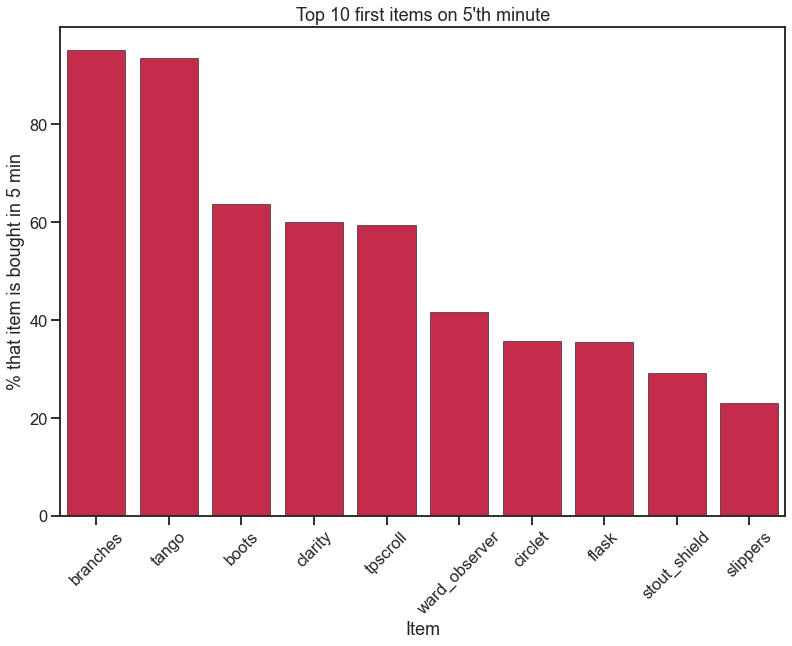

In [239]:
sns.barplot(data=five_min_df,
            x="item",
            y="persentage in matches",
            color='#DC143C',
            edgecolor='#000000',
            lw=0.5).set(xlabel='Item',
                      ylabel='% that item is bought in 5 min',
                      title="Top 10 first items on 5'th minute")
plt.xticks(rotation=45)
plt.show()

## Predict model

In this chapter I will analyze first five mins logs and analyze factors that will help me predict outcome of the match

To begin with, I will analyze only matches that last more than 15 minutes

### Prepare data

In [439]:
df_match.head(3)

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster,duration_min
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155,40
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154,43
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132,45


In [440]:
df_match_for_analysis = df_match[df_match['duration_min'] > 15][['match_id', 'first_blood_time', 'radiant_win']]

In [441]:
df_match_for_analysis.head(3)

,match_id,first_blood_time,radiant_win
0,0,1,True
1,1,221,False
2,2,190,False


In [443]:
df_player_time.head(3)

,match_id,times,gold_t_0,lh_t_0,xp_t_0,gold_t_1,lh_t_1,xp_t_1,gold_t_2,lh_t_2,xp_t_2,gold_t_3,lh_t_3,xp_t_3,gold_t_4,lh_t_4,xp_t_4,gold_t_128,lh_t_128,xp_t_128,gold_t_129,lh_t_129,xp_t_129,gold_t_130,lh_t_130,xp_t_130,gold_t_131,lh_t_131,xp_t_131,gold_t_132,lh_t_132,xp_t_132
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,60,409,0,63,142,1,186,168,0,125,200,0,193,194,1,125,174,2,77,138,1,62,345,6,351,100,0,77,613,1,125
2,0,120,546,0,283,622,4,645,330,0,376,345,1,698,628,5,374,354,4,437,673,5,543,684,12,805,200,0,210,815,5,323


In [460]:
df_player_time_15_min = df_player_time[df_player_time['times'] < 901]

In [461]:
df_player_time_15_min.head()

,match_id,times,gold_t_0,lh_t_0,xp_t_0,gold_t_1,lh_t_1,xp_t_1,gold_t_2,lh_t_2,xp_t_2,gold_t_3,lh_t_3,xp_t_3,gold_t_4,lh_t_4,xp_t_4,gold_t_128,lh_t_128,xp_t_128,gold_t_129,lh_t_129,xp_t_129,gold_t_130,lh_t_130,xp_t_130,gold_t_131,lh_t_131,xp_t_131,gold_t_132,lh_t_132,xp_t_132
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,60,409,0,63,142,1,186,168,0,125,200,0,193,194,1,125,174,2,77,138,1,62,345,6,351,100,0,77,613,1,125
2,0,120,546,0,283,622,4,645,330,0,376,345,1,698,628,5,374,354,4,437,673,5,543,684,12,805,200,0,210,815,5,323
3,0,180,683,1,314,927,9,1202,430,0,376,644,6,1172,806,7,570,614,8,829,895,8,842,958,16,1135,300,0,210,1290,8,527
4,0,240,956,1,485,1264,11,1583,530,0,391,919,11,1610,1281,10,1216,1082,8,1318,1087,10,1048,1500,26,1842,400,0,210,1431,9,589


In [462]:
df_player_time_15_min['gold_t_r'] = df_player_time_15_min['gold_t_1'] + df_player_time_15_min['gold_t_2'] + df_player_time_15_min['gold_t_3'] + df_player_time_15_min['gold_t_4'] + df_player_time_15_min['gold_t_0']
df_player_time_15_min['lh_t_r'] = df_player_time_15_min['lh_t_0'] + df_player_time_15_min['lh_t_1'] + df_player_time_15_min['lh_t_2'] + df_player_time_15_min['lh_t_3'] + df_player_time_15_min['lh_t_4']
df_player_time_15_min['xp_t_r'] = df_player_time_15_min['xp_t_0'] + df_player_time_15_min['xp_t_1'] + df_player_time_15_min['xp_t_2'] + df_player_time_15_min['xp_t_3'] + df_player_time_15_min['xp_t_4']

df_player_time_15_min['gold_t_d'] = df_player_time_15_min['gold_t_128'] + df_player_time_15_min['gold_t_129'] + df_player_time_15_min['gold_t_130'] + df_player_time_15_min['gold_t_131'] + df_player_time_15_min['gold_t_132']
df_player_time_15_min['lh_t_d'] = df_player_time_15_min['lh_t_128'] + df_player_time_15_min['lh_t_129'] + df_player_time_15_min['lh_t_130'] + df_player_time_15_min['lh_t_131'] + df_player_time_15_min['lh_t_132']
df_player_time_15_min['xp_t_d'] = df_player_time_15_min['xp_t_128'] + df_player_time_15_min['xp_t_129'] + df_player_time_15_min['xp_t_130'] + df_player_time_15_min['xp_t_131'] + df_player_time_15_min['xp_t_132']

In [463]:
df_player_time_15_min = df_player_time_15_min[['match_id', 'times', 'gold_t_r', 'lh_t_r','xp_t_r','gold_t_d','lh_t_d','xp_t_d']]

In [464]:
df_player_time_15_min_sum = df_player_time_15_min.groupby("match_id").sum()

In [465]:
df_player_time_15_min_sum.head()

,times,gold_t_r,lh_t_r,xp_t_r,gold_t_d,lh_t_d,xp_t_d
match_id,,,,,,,
0,7200,166112,1591,173410,174479,2048,167202
1,7200,175272,1746,172513,191461,1628,191523
2,7200,141496,1135,161384,143682,979,165138
3,7200,144215,1006,160248,138206,1201,146275
4,7200,188004,2175,176342,138366,1176,133939


In [466]:
df_match_15_min = df_match_for_analysis.join(df_player_time_15_min_sum, on='match_id')

In [467]:
df_match_15_min.head()

,match_id,first_blood_time,radiant_win,times,gold_t_r,lh_t_r,xp_t_r,gold_t_d,lh_t_d,xp_t_d
0,0,1,True,7200,166112,1591,173410,174479,2048,167202
1,1,221,False,7200,175272,1746,172513,191461,1628,191523
2,2,190,False,7200,141496,1135,161384,143682,979,165138
3,3,40,False,7200,144215,1006,160248,138206,1201,146275
4,4,58,True,7200,188004,2175,176342,138366,1176,133939


In [487]:
df_objectives.head(5)

,match_id,key,player1,player2,slot,subtype,team,time,value
0,0,NaN,0,6,0.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,1,309
1,0,NaN,3,-1,3.0,CHAT_MESSAGE_TOWER_KILL,2.0,894,2
2,0,NaN,2,-1,NaN,CHAT_MESSAGE_ROSHAN_KILL,2.0,925,200
3,0,NaN,1,-1,1.0,CHAT_MESSAGE_AEGIS,NaN,925,0
4,0,NaN,7,-1,7.0,CHAT_MESSAGE_TOWER_KILL,3.0,1016,3


In [488]:
df_objectives_15_min = df_objectives[df_objectives['time'] < 901]

In [489]:
df_objectives_15_min.head()

,match_id,key,player1,player2,slot,subtype,team,time,value
0,0,NaN,0,6,0.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,1,309
1,0,NaN,3,-1,3.0,CHAT_MESSAGE_TOWER_KILL,2.0,894,2
21,1,NaN,2,9,2.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,222,477
22,1,NaN,1,-1,1.0,CHAT_MESSAGE_TOWER_KILL,2.0,895,2
47,2,NaN,8,2,8.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,190,436


In [490]:
#"CHAT_MESSAGE_FIRSTBLOOD"
def team_r(row, message):
    if row['subtype'] == message:
        if row['player1'] < 5:
            return 1

In [491]:
#"CHAT_MESSAGE_FIRSTBLOOD":
def team_d(row, message):
    if row['subtype'] == message:
        if row['player1'] > 4:
            return 1

In [492]:
df_objectives_15_min['roshan_radiant'] = df_objectives_15_min.apply(lambda x: team_r(x, 'CHAT_MESSAGE_ROSHAN_KILL'), axis = 1)
df_objectives_15_min['roshan_dire'] = df_objectives_15_min.apply(lambda x: team_d(x, 'CHAT_MESSAGE_ROSHAN_KILL'), axis = 1)
#
df_objectives_15_min['firstblood_radiant'] = df_objectives_15_min.apply(lambda x: team_r(x, 'CHAT_MESSAGE_FIRSTBLOOD'), axis = 1)
df_objectives_15_min['firstblood_dire'] = df_objectives_15_min.apply(lambda x: team_d(x, 'CHAT_MESSAGE_FIRSTBLOOD'), axis = 1)

df_objectives_15_min['tower_radiant'] = df_objectives_15_min.apply(lambda x: team_r(x, 'CHAT_MESSAGE_TOWER_KILL'), axis = 1)
df_objectives_15_min['tower_dire'] = df_objectives_15_min.apply(lambda x: team_d(x, 'CHAT_MESSAGE_TOWER_KILL'), axis = 1)
#

In [493]:
df_objectives_15_min = df_objectives_15_min[['match_id', 'roshan_radiant', 'roshan_dire', 'firstblood_radiant', 'firstblood_dire', 'tower_radiant', 'tower_dire']]

In [494]:
df_objectives_15_min.head()

,match_id,roshan_radiant,roshan_dire,firstblood_radiant,firstblood_dire,tower_radiant,tower_dire
0,0,NaN,None,1.0,NaN,NaN,NaN
1,0,NaN,None,NaN,NaN,1.0,NaN
21,1,NaN,None,1.0,NaN,NaN,NaN
22,1,NaN,None,NaN,NaN,1.0,NaN
47,2,NaN,None,NaN,1.0,NaN,NaN


In [501]:
df_objectives_15_min_sum = df_objectives_15_min.groupby('match_id').sum()

In [511]:
df_match_15_min_obj = df_match_15_min.merge(df_objectives_15_min_sum, on='match_id')

In [505]:
df_match_15_min_obj.head()

,match_id,first_blood_time,radiant_win,times,gold_t_r,lh_t_r,xp_t_r,gold_t_d,lh_t_d,xp_t_d,roshan_radiant,firstblood_radiant,firstblood_dire,tower_radiant,tower_dire
0,0,1,True,7200,166112,1591,173410,174479,2048,167202,0.0,1.0,0.0,1.0,0.0
1,1,221,False,7200,175272,1746,172513,191461,1628,191523,0.0,1.0,0.0,1.0,0.0
2,2,190,False,7200,141496,1135,161384,143682,979,165138,0.0,0.0,1.0,0.0,0.0
3,3,40,False,7200,144215,1006,160248,138206,1201,146275,0.0,0.0,1.0,1.0,0.0
4,4,58,True,7200,188004,2175,176342,138366,1176,133939,0.0,1.0,0.0,2.0,0.0


### Compare stats in win situation and lose situtions

#### Average GPM

$$
\bar{GPM} = \frac{\sum\limits_{i=1}^{n}GPM(rad) + \sum\limits_{i=1}^{m}GPM(dire)}{n + m}
$$

In [541]:
rad_win_sum_gpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == True]['gold_t_r'].sum()
rad_win_count_gpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == True]['gold_t_r'].count()

In [542]:
dire_win_sum_gpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == False]['gold_t_d'].sum()
dire_win_count_gpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == False]['gold_t_d'].count()

In [543]:
rad_lose_sum_gpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == False]['gold_t_r'].sum()
rad_lose_count_gpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == False]['gold_t_r'].count()

In [544]:
dire_lose_sum_gpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == True]['gold_t_d'].sum()
dire_lose_count_gpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == True]['gold_t_d'].count()

In [545]:
mean_win_gpm = (rad_win_sum_gpm + dire_win_sum_gpm) / (rad_win_count_gpm + dire_win_count_gpm)

In [546]:
mean_lose_gpm = (rad_lose_sum_gpm + dire_lose_sum_gpm) / (rad_lose_count_gpm + dire_lose_count_gpm)

In [547]:
mean_win_gpm

162092.29998994266

In [548]:
mean_lose_gpm

150868.62592778838

In [564]:
rad_win_sum_xpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == True]['xp_t_r'].sum()
rad_win_count_xpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == True]['xp_t_r'].count()

In [565]:
dire_win_sum_xpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == False]['xp_t_d'].sum()
dire_win_count_xpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == False]['xp_t_d'].count()

In [566]:
rad_lose_sum_xpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == False]['xp_t_r'].sum()
rad_lose_count_xpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == False]['xp_t_r'].count()

In [567]:
dire_lose_sum_xpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == True]['xp_t_d'].sum()
dire_lose_count_xpm = df_match_15_min_obj[df_match_15_min_obj['radiant_win'] == True]['xp_t_d'].count()

In [568]:
mean_win_xpm = (rad_win_sum_xpm + dire_win_sum_xpm) / (rad_win_count_xpm + dire_win_count_xpm)

In [569]:
mean_lose_xpm = (rad_lose_sum_xpm + dire_lose_sum_xpm) / (rad_lose_count_xpm + dire_lose_count_xpm)

In [570]:
mean_win_xpm

170903.55973046363

In [571]:
mean_lose_xpm

161272.90033189178

#### First blood

In [572]:
df_match_15_min_obj.head(3)

,match_id,first_blood_time,radiant_win,times,gold_t_r,lh_t_r,xp_t_r,gold_t_d,lh_t_d,xp_t_d,roshan_radiant,firstblood_radiant,firstblood_dire,tower_radiant,tower_dire
0,0,1,True,7200,166112,1591,173410,174479,2048,167202,0.0,1.0,0.0,1.0,0.0
1,1,221,False,7200,175272,1746,172513,191461,1628,191523,0.0,1.0,0.0,1.0,0.0
2,2,190,False,7200,141496,1135,161384,143682,979,165138,0.0,0.0,1.0,0.0,0.0


In [573]:
df_match_15_min_obj['radiant_win'] == True

0         True
1        False
2        False
3        False
4         True
         ...  
49710     True
49711     True
49712     True
49713     True
49714    False
Name: radiant_win, Length: 49715, dtype: bool

#### Roshan